## Import Modules

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")

## Load Data

In [157]:
data=pd.read_csv(r"C:\Users\asus\OneDrive\Desktop\Projects\Titanic Survival Prediction\tested.csv")

In [158]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [159]:
# Check data rows and columns
data.shape

(418, 12)

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [161]:
# Check missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

In [162]:
# Drop 'Cabin' column
data=data.drop(columns='Cabin')

#### Handling Missing Values

In [163]:
# Replace the missing values in 'Age' column with age mean
data['Age']=data['Age'].fillna(data['Age'].mean())

In [164]:
# Remove rows with missing values in 'Fare' column
data.dropna(subset=['Fare'],inplace=True)

#### Remove duplicate data

In [165]:
# Drop duplicate data
data=data.drop_duplicates()

#### Correct data types

In [166]:
# Change 'Age' column data types to int
data['Age']=data['Age'].astype(int)

####

In [167]:
# Check again missing values
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [168]:
# Check last 5 rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,30,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,30,1,1,2668,22.3583,C


## Data Analysis

In [169]:
# Show statistics for all columns
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,417.000000,417.000000,417.000000,417,417,417.000000,417.000000,417.000000,417,417.000000,417
unique,NaN,NaN,NaN,417,2,NaN,NaN,NaN,362,NaN,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,S
freq,NaN,NaN,NaN,1,265,NaN,NaN,NaN,5,NaN,269
mean,1100.635492,0.364508,2.263789,NaN,NaN,30.119904,0.448441,0.393285,NaN,35.627188,NaN
std,120.923774,0.481870,0.842077,NaN,NaN,12.584522,0.897568,0.982419,NaN,55.907576,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,NaN
25%,996.000000,0.000000,1.000000,NaN,NaN,23.000000,0.000000,0.000000,NaN,7.895800,NaN
50%,1101.000000,0.000000,3.000000,NaN,NaN,30.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,1205.000000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.500000,NaN


In [170]:
# Check survived passenger count
data['Survived'].value_counts().rename(index={0: 'Did Not Survive', 1: 'Survived'})

Survived
Did Not Survive    265
Survived           152
Name: count, dtype: int64

## Data Visualization

#### Survived Column

Text(0.5, 1.0, 'Passenger Survival Count')

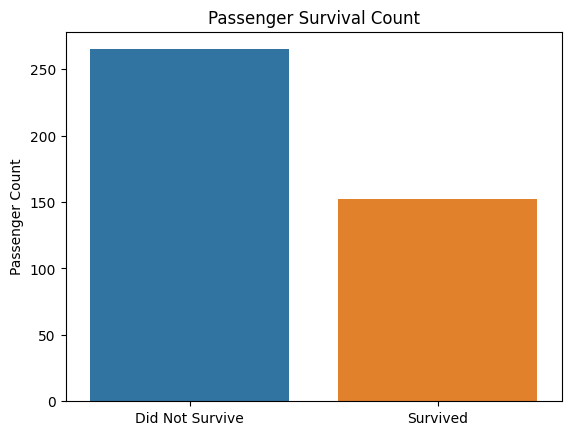

In [171]:
title=sns.countplot(data=data, x='Survived')
plt.ylabel('Passenger Count')
plt.xlabel('')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
title.set_title("Passenger Survival Count")

#### Age Column

Text(0, 0.5, 'Passenger Count')

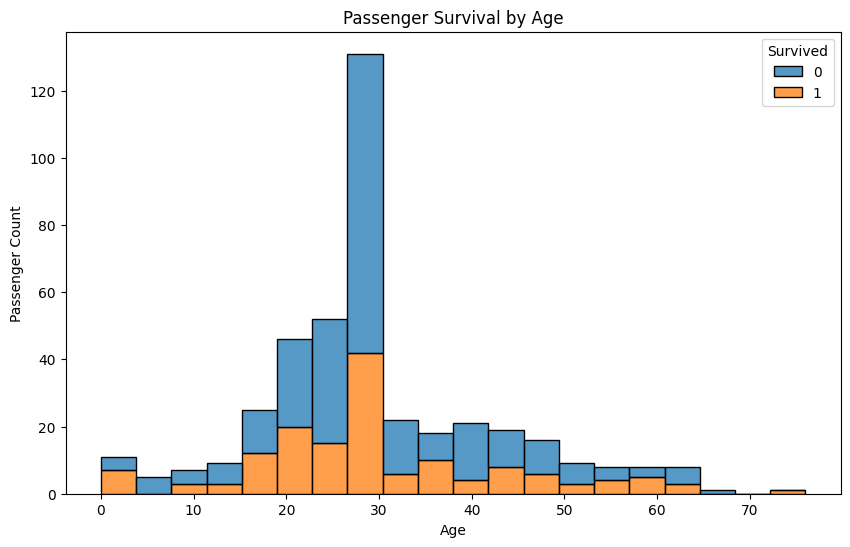

In [172]:
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Passenger Survival by Age')
plt.ylabel('Passenger Count')

#### Sex Column

In [173]:
data['Sex'].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

Text(0.5, 1.0, 'Proportion of Sex')

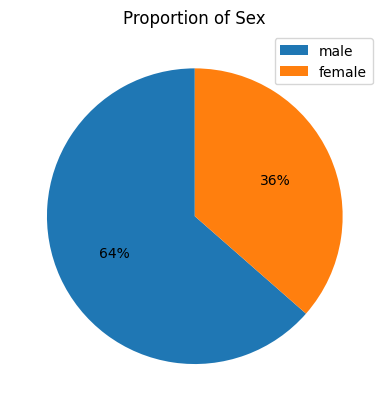

In [174]:
counts=data['Sex'].value_counts()
counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, labels=None)
plt.ylabel('')
plt.legend(labels=counts.index, loc='upper right')
plt.title('Proportion of Sex')

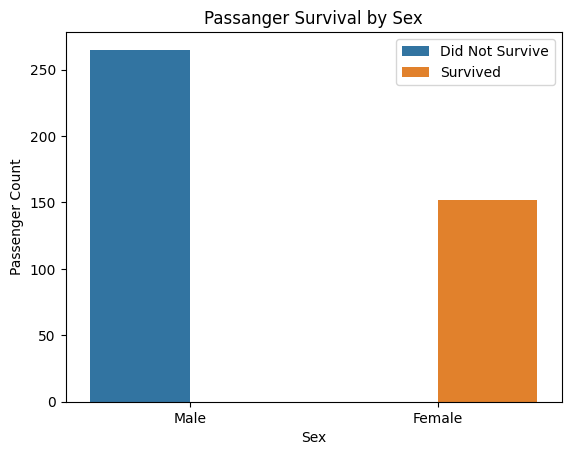

In [175]:
title=sns.countplot(data=data, x='Sex', hue='Survived')
plt.ylabel('Passenger Count')
plt.xticks([0, 1,], ['Male', 'Female'])
title.set_title('Passanger Survival by Sex')
plt.legend(['Did Not Survive', 'Survived'])

#### Pclass Column

Text(0.5, 1.0, 'Passenger Distribution by Class')

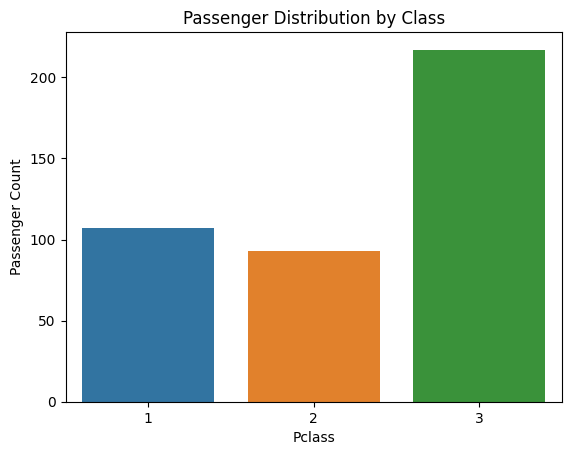

In [176]:
title = sns.countplot(data=data, x='Pclass')
plt.ylabel('Passenger Count')
title.set_title('Passenger Distribution by Class')

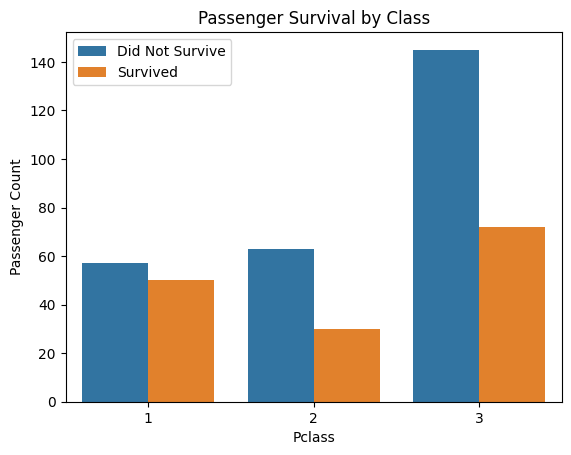

In [177]:
title = sns.countplot(data=data, x='Pclass', hue='Survived')
plt.ylabel('Passenger Count')
title.set_title('Passenger Survival by Class')
plt.legend(['Did Not Survive', 'Survived'])

#### Fare Column

In [178]:
data['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

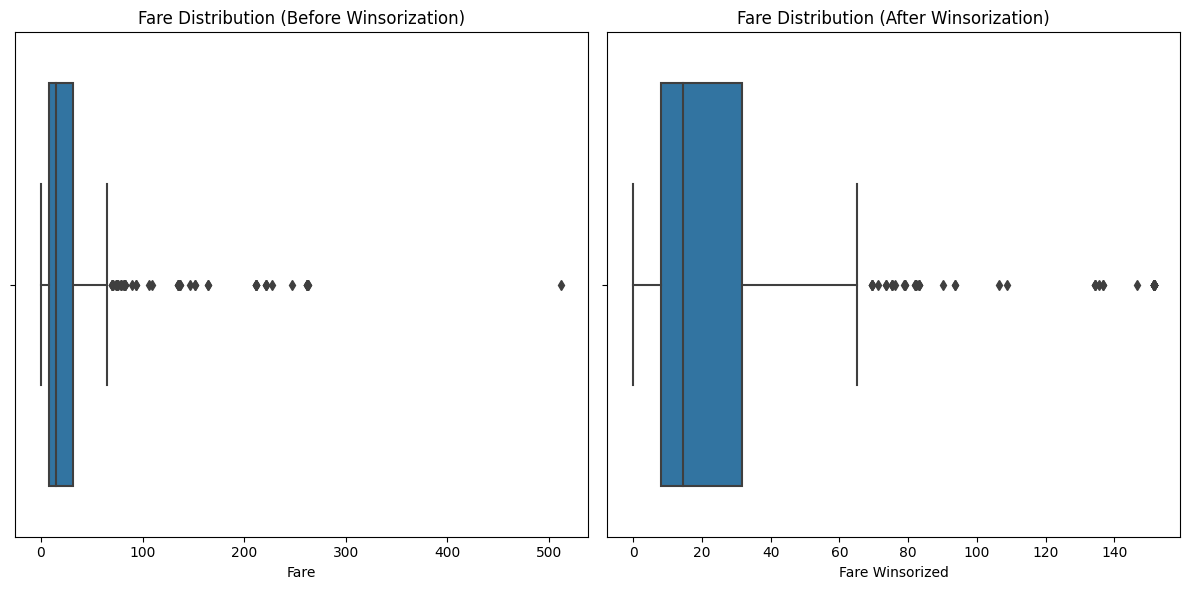

In [179]:
# Use Percentile Clapping (Winsorization) 

plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Fare')
plt.title('Fare Distribution (Before Winsorization)')

percentile_95=data['Fare'].quantile(0.95)

data['Fare Winsorized']=data['Fare'].clip(upper=percentile_95)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Fare Winsorized')
plt.title('Fare Distribution (After Winsorization)')

plt.tight_layout()

## Transform Data

In [180]:
# Convert categorical variables into numerical representations
data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
print(data)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex  Age  SibSp  Parch  \
0                                Kelly, Mr. James    0   34      0      0   
1                Wilkes, Mrs. James (Ellen Needs)    1   47      1      0   
2                       Myles, Mr. Thomas Francis    0   62      0      0   
3                                Wirz, Mr. Albert    0   27      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1   22      1      1   
..                                            ...  ...  ...    ...    ...   
413 

In [181]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare Winsorized
0,892,0,3,"Kelly, Mr. James",0,34,0,0,330911,7.8292,2,7.8292
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47,1,0,363272,7.0000,0,7.0000
2,894,0,2,"Myles, Mr. Thomas Francis",0,62,0,0,240276,9.6875,2,9.6875
3,895,0,3,"Wirz, Mr. Albert",0,27,0,0,315154,8.6625,0,8.6625
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22,1,1,3101298,12.2875,0,12.2875


#### Feature Selection

In [182]:
# Replace data in 'Fare' column with data in 'Fare Winsorized' column 
data['Fare']=data['Fare Winsorized']

# Drop the 'Fare Winsorized' column
data.drop(columns=['Fare Winsorized'], inplace=True)

# Choose variables
x=data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y=data['Survived']

In [183]:
print(x)

     Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
0         3    0   34      0      0    7.8292         2
1         3    1   47      1      0    7.0000         0
2         2    0   62      0      0    9.6875         2
3         3    0   27      0      0    8.6625         0
4         3    1   22      1      1   12.2875         0
..      ...  ...  ...    ...    ...       ...       ...
413       3    0   30      0      0    8.0500         0
414       1    1   39      0      0  108.9000         1
415       3    0   38      0      0    7.2500         0
416       3    0   30      0      0    8.0500         0
417       3    0   30      1      1   22.3583         1

[417 rows x 7 columns]


In [184]:
print(y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 417, dtype: int64


#### Split Data

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(417, 7) (312, 7) (105, 7)


#### Train the Model

In [186]:
# Choose and train the model (Logistic Regression)
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#### Test the Model

In [187]:
# Predict survival on testing data
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0]


#### Test Data Accuracy

In [188]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


## Evaluate the Model

In [189]:
print(x_test)

     Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
329       2    0   21      0      0  13.0000         0
20        1    0   55      1      0  59.4000         1
319       2    0   22      2      0  31.5000         0
222       2    1   22      0      0  10.5000         0
187       3    0   17      2      0   8.0500         0
..      ...  ...  ...    ...    ...      ...       ...
65        2    1   30      0      0  21.0000         0
171       3    0   27      0      0   7.2250         1
150       1    1   23      0      1  83.1583         1
94        1    0   25      0      0  26.0000         1
164       2    0   41      0      0  13.0000         0

[105 rows x 7 columns]


In [190]:
# Test Case
new_data = {
    'Pclass': 2,
    'Sex': 1,
    'Age': 28,
    'SibSp' : 0,
    'Parch' : 1,
    'Fare': 50,
    'Embarked': 0,
}

# Create a DataFrame for the new test case
new_df = pd.DataFrame([new_data])
print(new_df)

# Use the trained model to predict survival
predicted_survival = model.predict(new_df)

# Display the predicted survival
if predicted_survival[0] == 1:
    print("Predicted to survive")
else:
    print("Predicted not to survive")

   Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0       2    1   28      0      1    50         0
Predicted to survive
